In [111]:
import os
import urllib.request

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dbfread import DBF
from pandas import DataFrame

# Wind turbine optimization

## 0 - Importing data

In [112]:
"""
Load content of a DBF file into a Pandas data frame.

The iter() is required because Pandas doesn't detect that the DBF
object is iterable.

Loading the raw geospatial data into a Pandas data frame.

Datasource: https://www.swisstopo.admin.ch/en/home/meta/supply-structure/freely-available.html
"""

# Downloading a file from remote to a local file in a folder called Geospatial_raw_data_remote
dbf_url = 'https://github.com/percw/Swiss_wind-turbine_optimization/raw/b23d047c6f824bb225cc1b7d5aa559166f191ec6/Geospatial_raw_data/spat_pts/spat_pts.dbf'
shape_url = 'https://github.com/percw/Swiss_wind-turbine_optimization/raw/b23d047c6f824bb225cc1b7d5aa559166f191ec6/Geospatial_raw_data/spat_pts/spat_pts.shp'


# Checking if the folder Geospatial_raw_data exists, if not downloading the files from remote
if not os.path.exists('./Geospatial_raw_data/'):
	os.makedirs('./Geospatial_raw_data/spat_pts/')
	urllib.request.urlretrieve(dbf_url, './Geospatial_raw_data/spat_pts.dbf') 		# Loading the .dbf file
	urllib.request.urlretrieve(shape_url, './Geospatial_raw_data/spat_pts.shp') 	# Loading the .shp file

# Downloading the file from remote to local

# Loading the file from local to Pandas data frame
dbf = DBF('./Geospatial_raw_data/spat_pts.dbf', encoding='UTF-8')
gdf = gpd.read_file('./Geospatial_raw_data/spat_pts.shp')
df_dbf_raw = DataFrame(iter(dbf))



File: `spat_pts.dbf` - consists of candidate wind turbine locations in Switzerland which are technically feasible. The readme file provides details about the 30 attributes further attributes and the coordinate reference system. 

In [113]:
print(df_dbf_raw.head(10))
#print(df_shp_raw.head(10))

# Displaying the column names of the dbf file
print(df_dbf_raw.columns)

    PU_ID   LT  WT_ID  DIST_ISOS  DIST_UNE_N  DIST_UNE_K  DIST_BLN  DIST_VAEW  \
0   738.0  1.0    9.0      735.0    132448.0     16505.0     184.0   115789.0   
1   880.0  1.0   11.0      567.0    132177.0     16475.0     382.0   115340.0   
2   881.0  1.0   12.0      186.0    131844.0     15740.0     156.0   115343.0   
3  1021.0  1.0   15.0      424.0    131912.0     16340.0     389.0   114896.0   
4  1163.0  1.0   20.0     1288.0    131652.0     16255.0     349.0   114458.0   
5  1449.0  1.0   24.0      767.0    130084.0     14166.0     412.0   113543.0   
6  1586.0  1.0   25.0      940.0    131307.0     17251.0     650.0   113249.0   
7  1589.0  1.0   28.0     1856.0    130159.0     14700.0     223.0   113097.0   
8  1590.0  1.0   29.0      636.0    129811.0     14094.0     387.0   113089.0   
9  1591.0  1.0   30.0      847.0    129481.0     13388.0     225.0   113102.0   

   DIST_RAD  DIST_AIR  ...  COHER_AREA  VIS_ARE_ha  ENER_DENS     DIST_NATPA  \
0   26065.0    2861.0  ...  

## 0.1 - Discovering the data 

In [114]:

print(f'Number of technically possible wind turbine locations: {len(df_dbf_raw["PU_ID"].unique())}')
print(f'Number of canton where its feasible to place wind turbine: {len(df_dbf_raw["CANT_NAME"].unique())}')
print(f'The cantons are: {df_dbf_raw["CANT_NAME"].unique()}')

Number of technically possible wind turbine locations: 12238
Number of canton where its feasible to place wind turbine: 27
The cantons are: ['GenÃ¨ve' 'Vaud' 'NeuchÃ¢tel' 'Fribourg' 'Valais' 'Bern' 'Jura'
 'Solothurn' 'Basel-Landschaft' 'Basel-Stadt' 'Aargau' 'Luzern' 'Obwalden'
 'Nidwalden' 'ZÃ¼rich' 'Zug' 'Schaffhausen' 'Schwyz' 'Uri' 'Thurgau'
 'Ticino' 'St. Gallen' 'Glarus' 'GraubÃ¼nden' 'Appenzell Ausserrhoden'
 'Appenzell Innerrhoden' '']


Checking out the canton with the empty string

In [115]:
display(df_dbf_raw[df_dbf_raw["CANT_NAME"] == ''])

,PU_ID,LT,WT_ID,DIST_ISOS,DIST_UNE_N,DIST_UNE_K,DIST_BLN,DIST_VAEW,DIST_RAD,DIST_AIR,...,COHER_AREA,VIS_ARE_ha,ENER_DENS,DIST_NATPA,STRE_ALTI,DIST_REG_N,weigh_stre,prod_MW,KIBK,CANT_NAME
11483,44486.0,3.0,90016.0,4448.0,103730.0,25509.0,1211.0,118303.0,110823.0,4602.0,...,0.060856,16516.0,0.17994,240473.993717,884.0,0.0,669.999901,8173.304396,4.0,


Investigating the shapefile

In [116]:
display(gdf.columns)
display(gdf.head())

Index(['PU_ID', 'LT', 'WT_ID', 'DIST_ISOS', 'DIST_UNE_N', 'DIST_UNE_K',
       'DIST_BLN', 'DIST_VAEW', 'DIST_RAD', 'DIST_AIR', 'DIST_MIL',
       'DIST_FLOOD', 'DIST_MEAD', 'DIST_JB', 'DIST_BIOS', 'DIST_STRE',
       'DIST_FOR', 'DIST_HZ', 'DIST_IZ', 'DIST_PL', 'DIST_BUILD', 'ALTI',
       'NOISE', 'FFF', 'VIS_AREA', 'VIS_IMPACT', 'VIS_INFRA', 'VIS_POP',
       'COHER_AREA', 'VIS_ARE_ha', 'ENER_DENS', 'DIST_NATPA', 'STRE_ALTI',
       'DIST_REG_N', 'weigh_stre', 'prod_MW', 'KIBK', 'CANT_NAME', 'geometry'],
      dtype='object')

,PU_ID,LT,WT_ID,DIST_ISOS,DIST_UNE_N,DIST_UNE_K,DIST_BLN,DIST_VAEW,DIST_RAD,DIST_AIR,...,VIS_ARE_ha,ENER_DENS,DIST_NATPA,STRE_ALTI,DIST_REG_N,weigh_stre,prod_MW,KIBK,CANT_NAME,geometry
0,738.0,1.0,9.0,735.0,132448.0,16505.0,184.0,115789.0,26065.0,2861.0,...,28132.0,0.405058,314835.059489,457.0,24717.649525,219.999966,11395.094829,4.0,GenÃ¨ve,POINT (487660.175 118136.448)
1,880.0,1.0,11.0,567.0,132177.0,16475.0,382.0,115340.0,26638.0,1965.0,...,29088.0,0.400389,314505.331052,455.0,25089.914492,111.000053,11646.518761,4.0,GenÃ¨ve,POINT (488110.175 117357.025)
2,881.0,1.0,12.0,186.0,131844.0,15740.0,156.0,115343.0,25176.0,3242.0,...,27704.0,0.397480,314276.488429,432.0,23823.745962,160.000017,11011.797909,2.0,GenÃ¨ve,POINT (488110.175 118915.871)
3,1021.0,1.0,15.0,424.0,131912.0,16340.0,389.0,114896.0,27229.0,1068.0,...,28600.0,0.395229,314177.833777,419.0,25488.529743,111.000031,11303.539758,1.0,GenÃ¨ve,POINT (488560.175 116577.603)
4,1163.0,1.0,20.0,1288.0,131652.0,16255.0,349.0,114458.0,27836.0,171.0,...,28680.0,0.417131,313852.574631,377.0,25912.279012,785.999983,11963.309177,3.0,GenÃ¨ve,POINT (489010.175 115798.180)


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_74850/2484686331.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


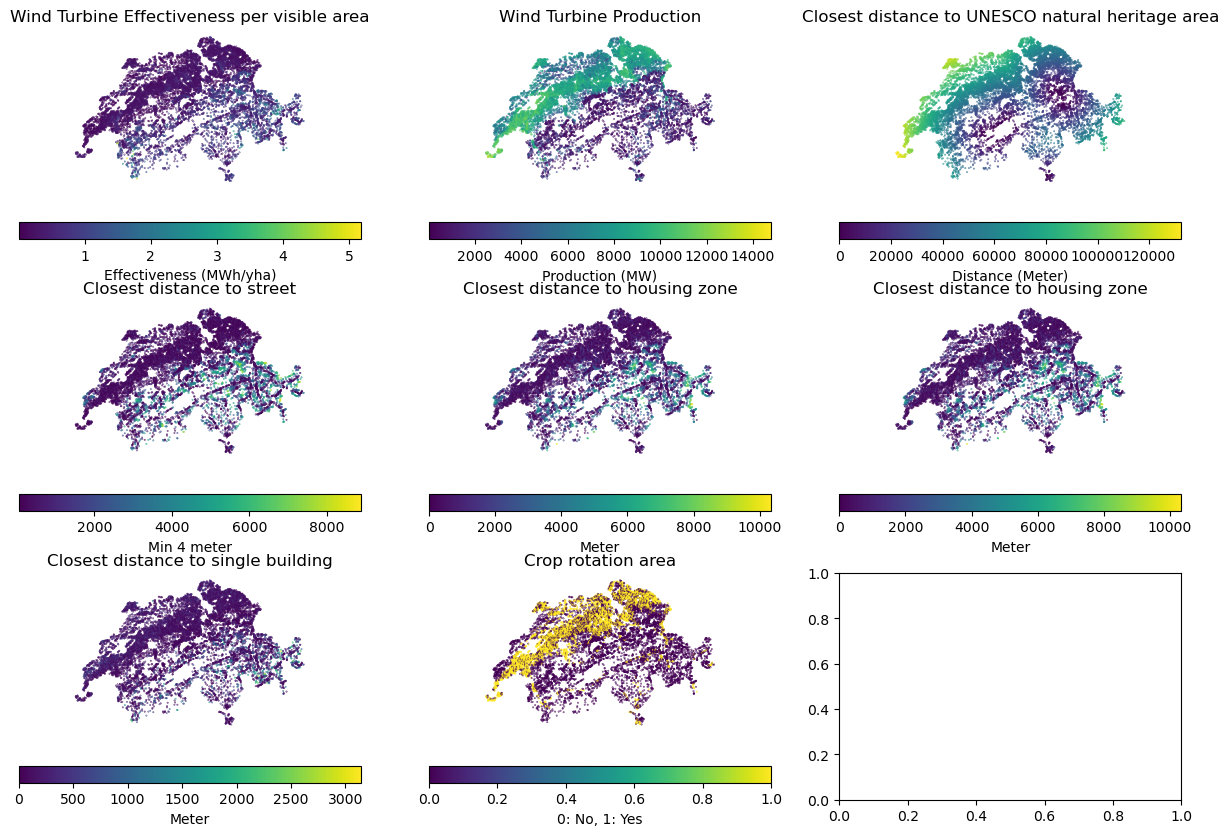

In [117]:
# Creating a figure with six subplots

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

markersize = 0.1

gdf.plot(column='ENER_DENS', ax=axes[0, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Effectiveness (MWh/yha)", 'orientation': "horizontal"})
axes[0, 0].set_title("Wind Turbine Effectiveness per visible area")
axes[0, 0].set_axis_off()

gdf.plot(column='prod_MW', ax=axes[0, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Production (MW)", 'orientation': "horizontal"})
axes[0, 1].set_title("Wind Turbine Production")
axes[0, 1].set_axis_off()

gdf.plot(column='DIST_UNE_N', ax=axes[0, 2], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Distance (Meter)", 'orientation': "horizontal"})
axes[0, 2].set_title("Closest distance to UNESCO natural heritage area")
axes[0, 2].set_axis_off()

gdf.plot(column='DIST_STRE', ax=axes[1, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Min 4 meter", 'orientation': "horizontal"})
axes[1, 0].set_title("Closest distance to street")
axes[1, 0].set_axis_off()

gdf.plot(column='DIST_HZ', ax=axes[1, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[1, 1].set_title("Closest distance to housing zone")
axes[1, 1].set_axis_off()

gdf.plot(column='DIST_HZ', ax=axes[1, 2], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[1, 2].set_title("Closest distance to housing zone")
axes[1, 2].set_axis_off()

gdf.plot(column='DIST_BUILD', ax=axes[2, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[2, 0].set_title("Closest distance to single building")
axes[2, 0].set_axis_off()

gdf.plot(column='FFF', ax=axes[2, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "0: No, 1: Yes", 'orientation': "horizontal"})
axes[2, 1].set_title("Crop rotation area")
axes[2, 1].set_axis_off()

# Showing the plot
fig.show()


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_74850/2869033568.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


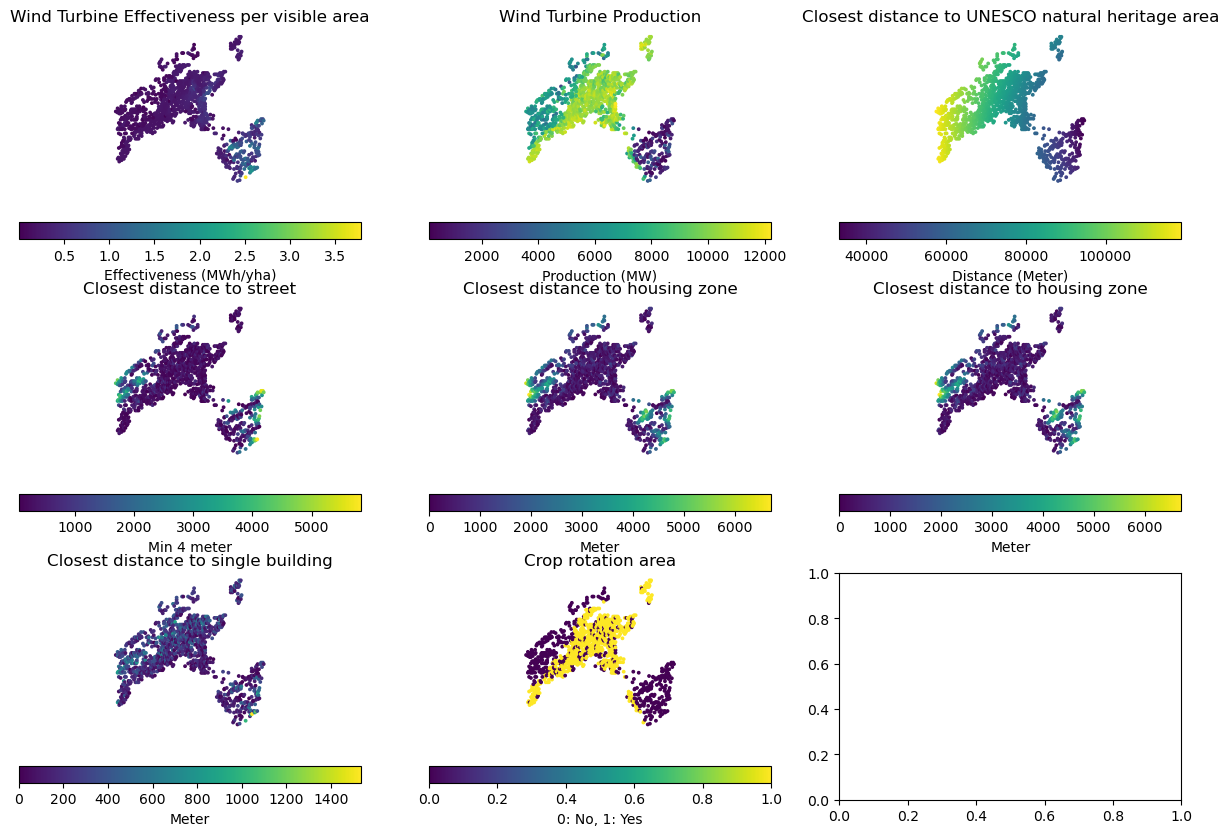

In [118]:
# Creating a figure with six subplots

gdf = gdf[gdf['CANT_NAME'] ==  'Vaud']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

markersize = 3

gdf.plot(column='ENER_DENS', ax=axes[0, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Effectiveness (MWh/yha)", 'orientation': "horizontal"})
axes[0, 0].set_title("Wind Turbine Effectiveness per visible area")
axes[0, 0].set_axis_off()

gdf.plot(column='prod_MW', ax=axes[0, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Production (MW)", 'orientation': "horizontal"})
axes[0, 1].set_title("Wind Turbine Production")
axes[0, 1].set_axis_off()

gdf.plot(column='DIST_UNE_N', ax=axes[0, 2], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Distance (Meter)", 'orientation': "horizontal"})
axes[0, 2].set_title("Closest distance to UNESCO natural heritage area")
axes[0, 2].set_axis_off()

gdf.plot(column='DIST_STRE', ax=axes[1, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Min 4 meter", 'orientation': "horizontal"})
axes[1, 0].set_title("Closest distance to street")
axes[1, 0].set_axis_off()

gdf.plot(column='DIST_HZ', ax=axes[1, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[1, 1].set_title("Closest distance to housing zone")
axes[1, 1].set_axis_off()

gdf.plot(column='DIST_HZ', ax=axes[1, 2], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[1, 2].set_title("Closest distance to housing zone")
axes[1, 2].set_axis_off()

gdf.plot(column='DIST_BUILD', ax=axes[2, 0], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "Meter", 'orientation': "horizontal"})
axes[2, 0].set_title("Closest distance to single building")
axes[2, 0].set_axis_off()

gdf.plot(column='FFF', ax=axes[2, 1], markersize=markersize, cmap='viridis', legend=True, legend_kwds={
    'label': "0: No, 1: Yes", 'orientation': "horizontal"})
axes[2, 1].set_title("Crop rotation area")
axes[2, 1].set_axis_off()

# Showing the plot
fig.show()


## Watermark for programming environment

In [119]:
%load_ext watermark
%watermark -v -m -p numpy,pandas,matplotlib,seaborn,dbfread,ortools


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.12.0

numpy     : 1.21.5
pandas    : 1.4.3
matplotlib: 3.7.1
seaborn   : 0.12.2
dbfread   : 2.0.7
ortools   : 9.6.2534

Compiler    : Clang 13.0.1 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

